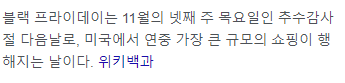

In [1]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import platform
from pandas.core.dtypes.common import is_numeric_dtype
warnings.filterwarnings("ignore")
sns.set_palette("dark")

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/jinhyukbae/data_test/main/bf_day/train.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.info()

# Product_Category_2, Product_Category_3의 결측치
# 오브젝트 타입

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df.describe(include='O')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


<AxesSubplot: >

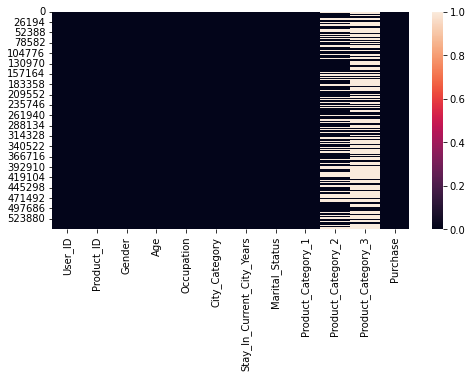

In [7]:
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull())


In [8]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
df.isnull().sum()/len(df)

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.315666
Product_Category_3            0.696727
Purchase                      0.000000
dtype: float64

In [10]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

왜도 ->0.60,첨도-0.34


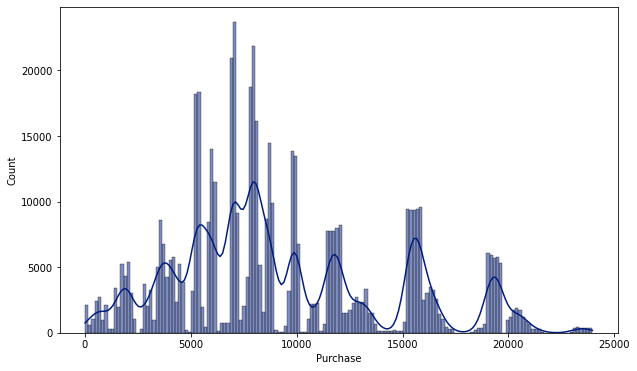

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(df.Purchase, kde=True)
print("왜도 ->{:.2f},첨도{:.2f}".format(df.Purchase.skew(),df.Purchase.kurtosis()))
plt.show()

## 아웃라이어 확인

<AxesSubplot: xlabel='Purchase'>

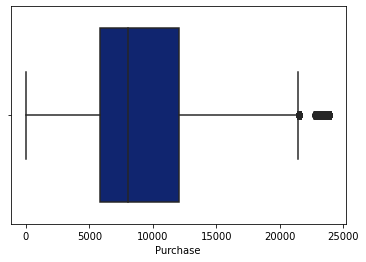

In [12]:
# 아웃라이어 
sns.boxplot(df.Purchase)


# 2만이 넘으면 아웃라이어 

In [13]:
# q3 + 1.5 * (q3-q1) 
q1 = df.Purchase.quantile(0.25)
q3 = df.Purchase.quantile(0.75)
iqr = q3-q1

upper = q3+1.5*iqr

print(upper)

21400.5


In [14]:
df.Purchase[df.Purchase > 21400.5] = upper

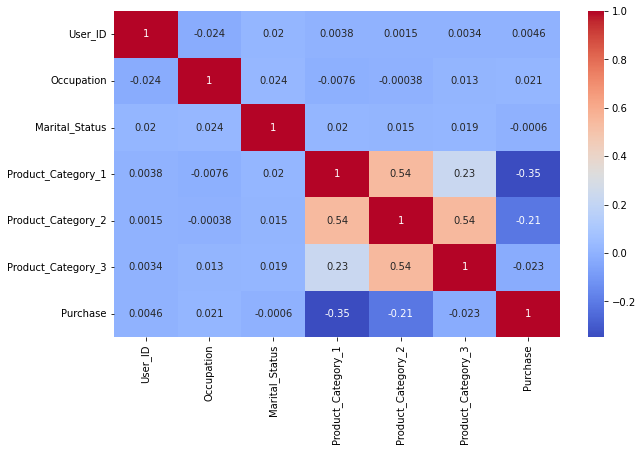

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

## EDA

* 요약

* 성별
  * 남자(75%)가 여자(25%)보다 많이 구매한다.
  * 구매력 남자가 여자보다 높다.

* 나이별 
  * 26-35(40%) , 36-45(20%) 연령대가 과반수 이상 구매한다.
  * 구매력은 51-55 연령대가 제일 높다.

* 직업별
  * 4번 직업(13%) 0번 직업(13%) 7번 직업(11%)이 제일 많이 구매한다.
  * 구매력은 17번 직업이 제일 높다.

* 지역별
  * B 지역(42%)이 제일 많이 구매한다.
  * 구매력은 C 지역이 제일 높다.

* 결혼여부, 그 지역에서 산 년도는 구매력과 상관관계가 없다 

* 카테고리별
  * Product_Category_1 에선 6, 7, 9, 10, 15 16이 제일 비쌈
  * Product_Category_2 에선 2, 6,10 이 제일 비쌈
  * Product_Category_3 에선 3, 6, 8, 10, 13이 제일 비쌈 

In [16]:
def EDA(var,explode):
  sns.set_palette("Set3")
  plt.figure(figsize=(25,7))

  plt.subplot(1,2,1)
  plt.pie(df[var].value_counts(),labels=df[var].value_counts().index, autopct="%.0f%%",
          shadow = True,
          explode = explode
          )
  plt.title("Distribution of {}".format(var), fontsize=25)

  plt.subplot(1,2,2)
  ax = sns.barplot(df[var], df.Purchase)
  for bars in ax.containers:
    ax.bar_label(bars)
    plt.title("{}and Purchase chart".format(var), fontsize=25)

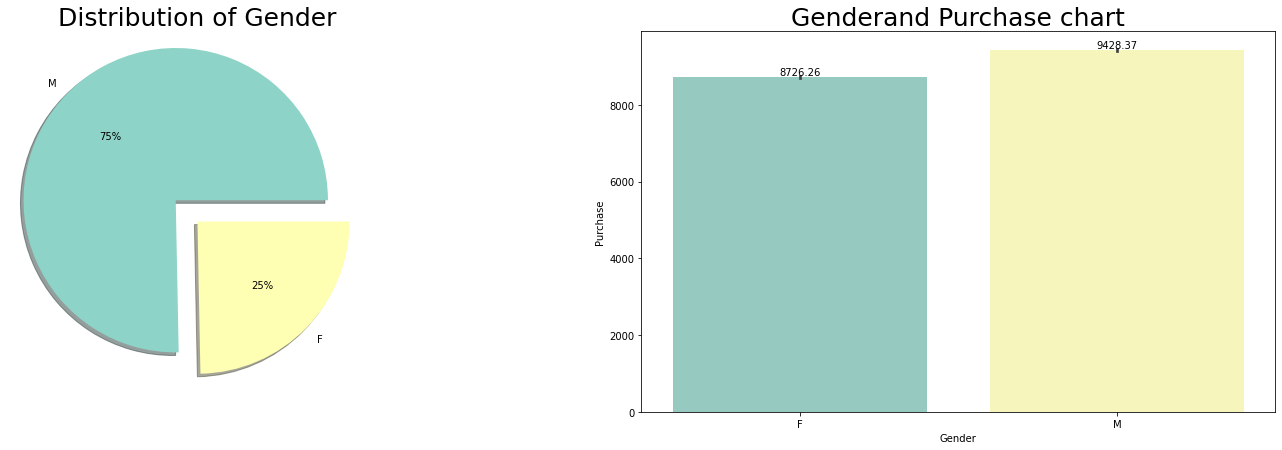

In [17]:
# 성별별 구매금액

EDA("Gender",[0.2,0])

# 남자 75% 여자 25% 
# 남자가 더 많이 샀다.

In [18]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

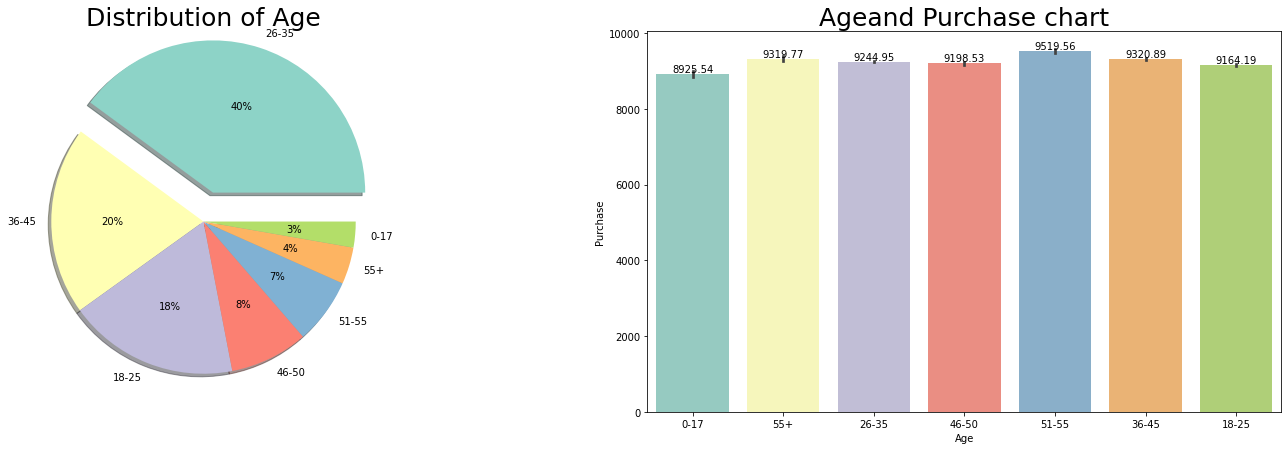

In [19]:
EDA("Age",[0.2,0,0,0,0,0,0])

# 40%가 26-35대 20%가 36-45

# 지출은 51-55가 제일 많다

In [20]:
df['Occupation'].value_counts().index

Int64Index([4, 0, 7, 1, 17, 20, 12, 14, 2, 16, 6, 3, 10, 5, 15, 11, 19, 13, 18,
            9, 8],
           dtype='int64')

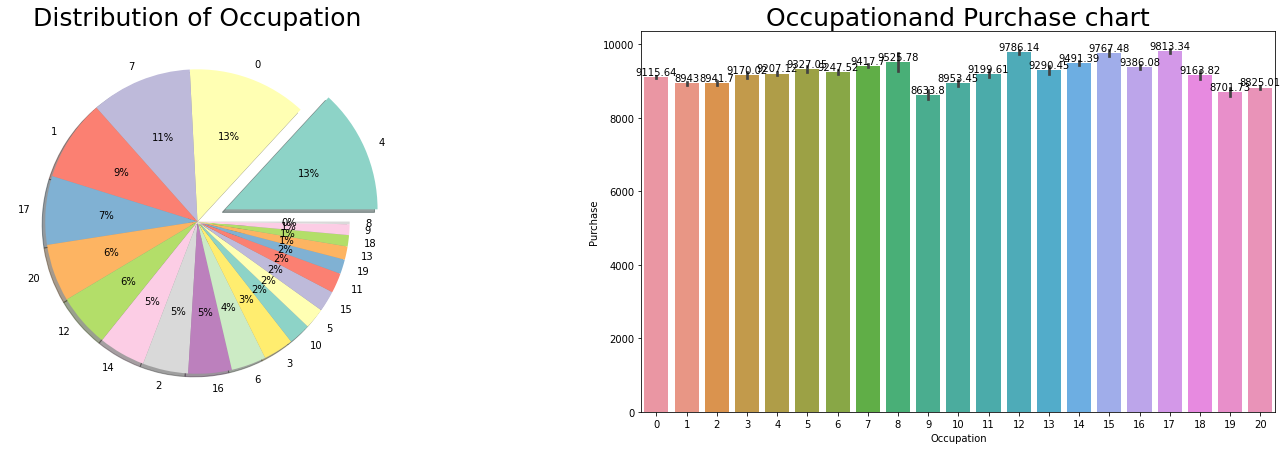

In [21]:
EDA('Occupation',[0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


# 4번 13 0번 13 7번 11 직업
# 17번 직업이 돈은 제일 많이 씀

In [22]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

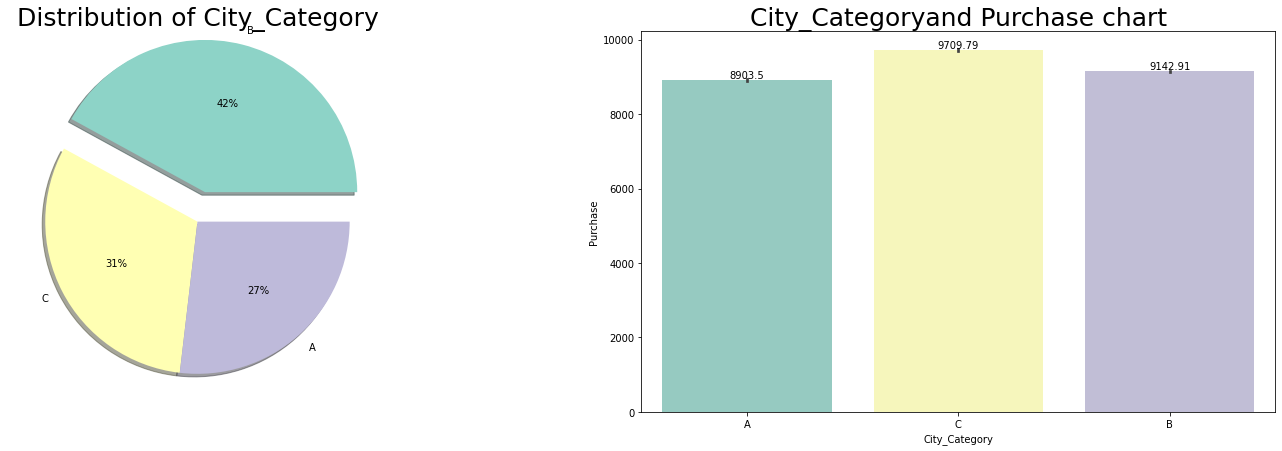

In [23]:
EDA('City_Category',[0.2,0,0])

# B 지역 구매율이 42퍼로 제일 높음
# 소비는 C지역에서 제일 많이함 

In [24]:
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

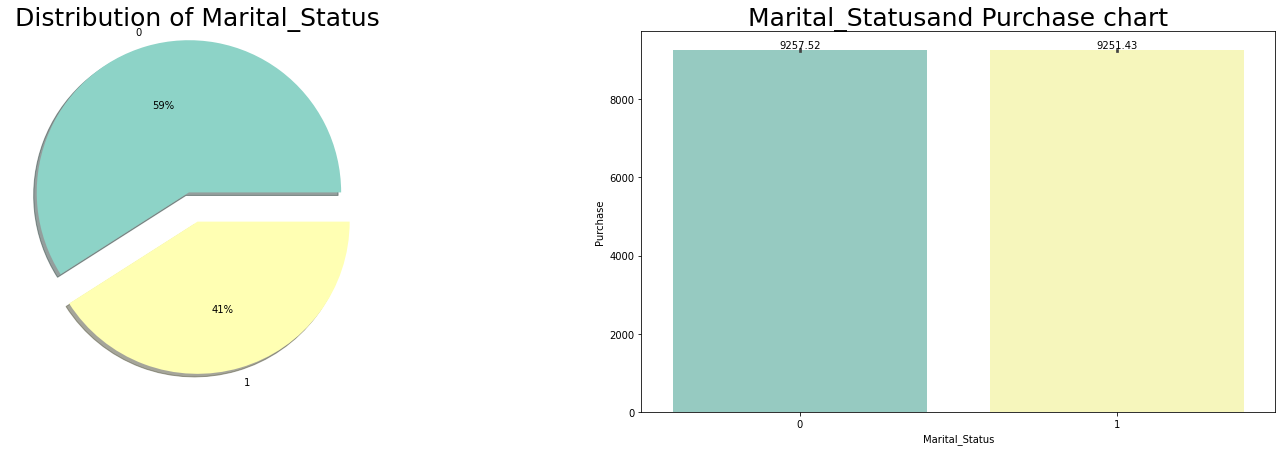

In [25]:
EDA('Marital_Status',[0.2,0])

# 59% 는 결혼 안했고 41퍼는 결혼함 소비금액 차이는 없음

In [26]:
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

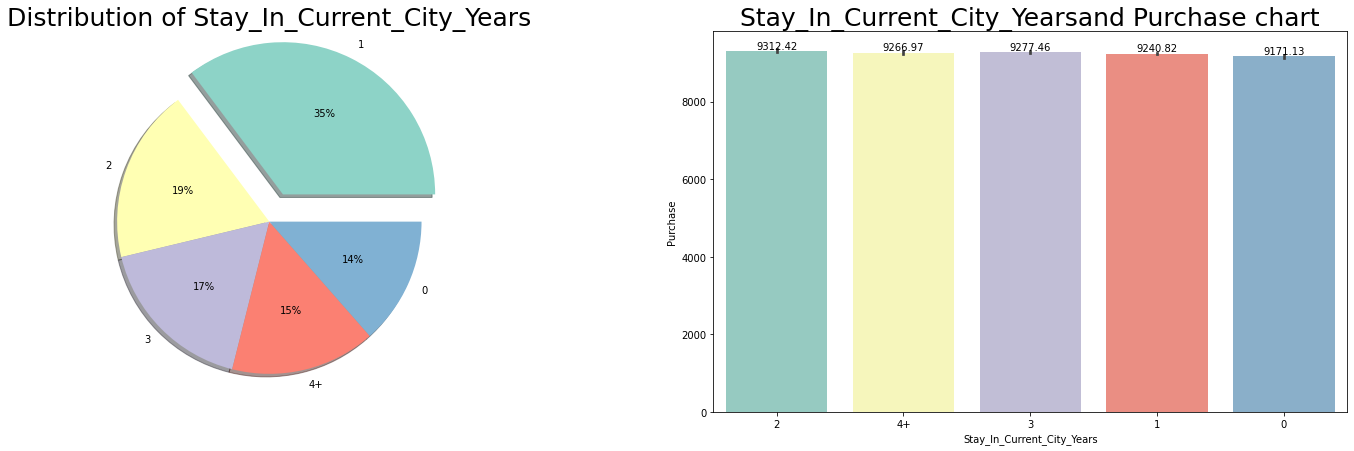

In [27]:
EDA('Stay_In_Current_City_Years',[0.2,0,0,0,0])

# 몇년 산 지는 영향 없는 듯

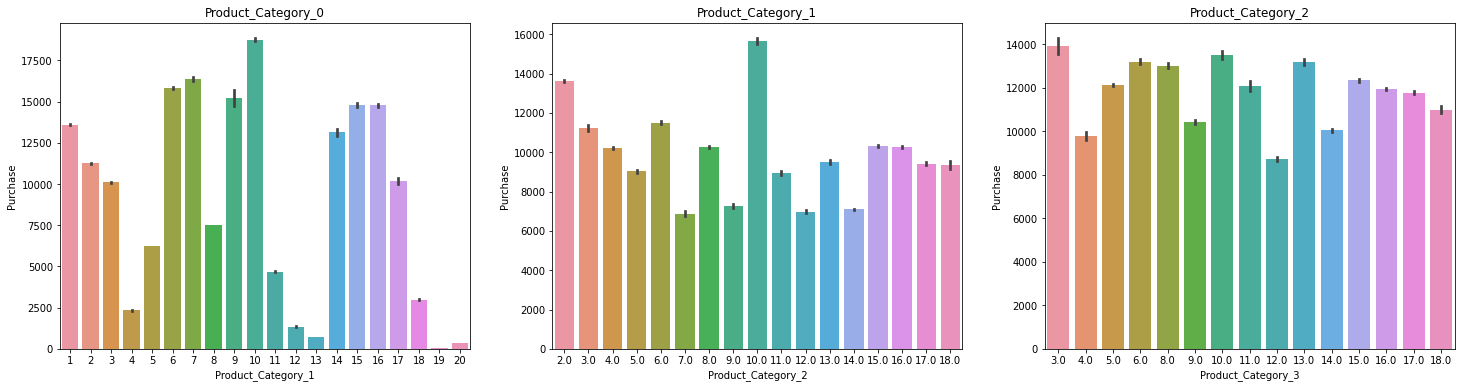

In [28]:
var_list = ["Product_Category_1", "Product_Category_2", "Product_Category_3"]

plt.figure(figsize=(25,6))

for i in np.arange(0,3):
  plt.subplot(1,3,i+1)
  sns.barplot(df[var_list[i]],df.Purchase)
  plt.title('Product_Category_{}'.format(i))

plt.show()  


# Product_Category_1 에선 6, 7, 9, 10, 15 16이 제일 비쌈
# Product_Category_2 에선 2, 6,10 이 제일 비쌈
# Product_Category_3 에선 3, 6, 8, 10, 13이 제일 비쌈 

## pre processing

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 50.4+ MB


In [30]:
df.Product_Category_2 = df.Product_Category_2.fillna(0)
df.Product_Category_3 = df.Product_Category_3.fillna(0)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 50.4+ MB


In [32]:
df.describe(include='O')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


### labelencoding

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
for col in df.columns:
  if is_numeric_dtype(df[col]):
    continue
  else:
    df[col] = le.fit_transform(df[col])
df.head()    

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,672,0,0,10,0,2,0,3,0.0,0.0,8370.0
1,1000001,2376,0,0,10,0,2,0,1,6.0,14.0,15200.0
2,1000001,852,0,0,10,0,2,0,12,0.0,0.0,1422.0
3,1000001,828,0,0,10,0,2,0,12,14.0,0.0,1057.0
4,1000002,2734,1,6,16,2,4,0,8,0.0,0.0,7969.0


In [35]:
# y랑 상관관계 
pd.DataFrame(abs(df.corr()["Purchase"]).sort_values(ascending=False).iloc[1:])

,Purchase
Product_Category_1,0.347413
Product_Category_3,0.289723
Product_ID,0.108744
City_Category,0.062072
Gender,0.060557
Product_Category_2,0.050771
Occupation,0.020853
Age,0.015368
Stay_In_Current_City_Years,0.005471
User_ID,0.004608


### scaling

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaler = scaler.fit_transform(df)
df_scaler = pd.DataFrame(df_scaler)
df_scaler.columns=list(df)

In [37]:
df_scaler

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0.000000,0.185124,0.0,0.000000,0.50,0.0,0.50,0.0,0.105263,0.000000,0.000000,0.390771
1,0.000000,0.654545,0.0,0.000000,0.50,0.0,0.50,0.0,0.000000,0.333333,0.777778,0.710101
2,0.000000,0.234711,0.0,0.000000,0.50,0.0,0.50,0.0,0.578947,0.000000,0.000000,0.065923
3,0.000000,0.228099,0.0,0.000000,0.50,0.0,0.50,0.0,0.578947,0.777778,0.000000,0.048858
4,0.000166,0.753168,1.0,1.000000,0.80,1.0,1.00,0.0,0.368421,0.000000,0.000000,0.372022
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,0.998841,0.982645,1.0,0.833333,0.65,0.5,0.25,1.0,1.000000,0.000000,0.000000,0.016644
550064,0.999172,0.982920,0.0,0.333333,0.05,1.0,0.75,0.0,1.000000,0.000000,0.000000,0.016785
550065,0.999338,0.982920,0.0,0.333333,0.75,0.5,1.00,1.0,1.000000,0.000000,0.000000,0.005844
550066,0.999669,0.982920,0.0,1.000000,0.05,1.0,0.50,0.0,1.000000,0.000000,0.000000,0.016504


### vif 분산 팽창 인수(VIF, Variance Inflation Factor)

 

* 다중공선성(multicollinearity)을 파악할 때 쓰이는 지표 
  * 다중공선성이란 예측 변수들 간의 상관성이 높은지를 파악하는 것
  

* 결론 VIF는 1에 가까울 수록 좋고 10이 넘으면 다중공선성이 있어서 사용하는 데 좋지 않음

In [38]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor



# vif_data = pd.DataFrame()
# vif_data["Feature"] = df_scaler.columns
  
# # calculating VIF for each feature
# vif_data["VIF"] = [variance_inflation_factor(df_scaler.values, i)
#                           for i in range(len(df_scaler.columns))]
  
# vif_data

In [39]:
# vif_data

In [40]:
# df_scaler

In [41]:
x = df_scaler.drop(["Purchase"], axis = 1)
y = df["Purchase"]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0)

In [42]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
xgbm = XGBRegressor(n_jobs=-1,
    n_estimators=1000,
    alpha= 3.6353429991712695e-08,
    subsample= 0.9423675532438815,
    colsample_bytree= 0.9830450413657872,
    min_child_weight= 8,
    eta= 0.3749337530972536,
    gamma= 0.0745370910451703,
    grow_policy= 'depthwise')
xgbm.fit(x_train,y_train)

pred = xgbm.predict(x_test)

r2_score(y_test,pred)

[12:13:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.7104565158583507

In [43]:
y_df = pd.DataFrame(df["Purchase"]) 

predict = np.floor(xgbm.predict(x)) #독립변수로만 예측 
y_df['predict'] = predict

In [44]:
y_df.tail()

,Purchase,predict
550063,368.0,919.0
550064,371.0,-1266.0
550065,137.0,158.0
550066,365.0,71.0
550067,490.0,289.0


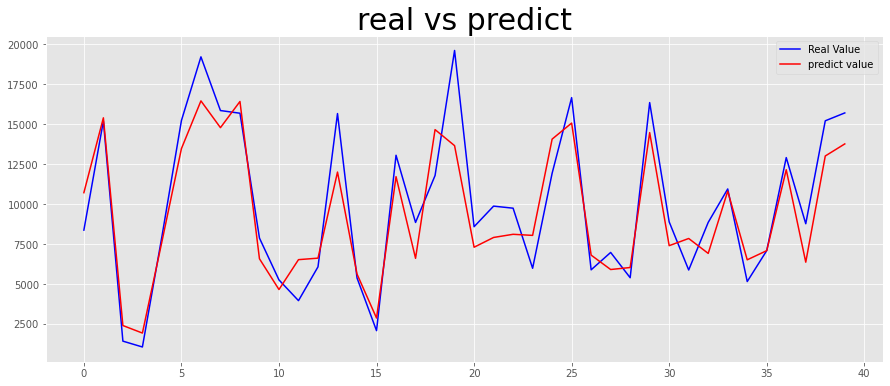

In [46]:
plt.style.use("ggplot")
plt.figure(figsize=(15,6))
plt.plot(y_df[0:40]['Purchase'], color = "b", label="Real Value") # 진짜 값
plt.plot(y_df[0:40]['predict'], color = "r", label ="predict value") # 예측 값 
plt.legend()
plt.title("real vs predict", fontsize=30)
plt.show()